### Phase 1 : Initial population

In [1]:
import random

# Define the cities and their properties (days to stay, cost)
cities = {
    'A': {'days': 3, 'cost': 80},
    'B': {'days': 4, 'cost': 85},
    'C': {'days': 5, 'cost': 100},
    'D': {'days': 2, 'cost': 45},
    'E': {'days': 3, 'cost': 75},
    'F': {'days': 1, 'cost': 25},
    'G': {'days': 6, 'cost': 50},
    'H': {'days': 8, 'cost': 205},
    'I': {'days': 1, 'cost': 24},
    'J': {'days': 7, 'cost': 200},
}

# Define parameters for the genetic algorithm
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
NUM_GENERATIONS = 100

# Function to generate an initial population
def generate_initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        itinerary = [random.choice(list(cities.keys())) for _ in range(num_cities)]
        population.append(itinerary)
    return population

# Function to calculate the fitness of an individual itinerary
def calculate_fitness(itinerary):
    total_days = 0
    total_cost = 0
    unique_cities = set()
    for city in itinerary:
        total_days += cities[city]['days']
        total_cost += cities[city]['cost']
        unique_cities.add(city)
    # Penalize if total days exceed 14
    if total_days > 14:
        total_cost += (total_days - 14) * 10  # Penalty cost for exceeding 14 days
    return 1 / (total_cost + len(unique_cities))  # Fitness is inversely proportional to total cost and proportional to number of unique cities visited

# Function to perform crossover between two parent itineraries
def crossover(parent1, parent2):
    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Function to perform mutation on an itinerary
def mutate(itinerary):
    mutated_itinerary = itinerary[:]
    for i in range(len(mutated_itinerary)):
        if random.random() < MUTATION_RATE:
            mutated_itinerary[i] = random.choice(list(cities.keys()))
    return mutated_itinerary

# Genetic algorithm main function
def genetic_algorithm():
    population = generate_initial_population(POPULATION_SIZE, 10)  # Initialize population
    for generation in range(NUM_GENERATIONS):
        # Evaluate fitness of each individual in the population
        fitness_scores = [(itinerary, calculate_fitness(itinerary)) for itinerary in population]
        # Sort individuals by their fitness scores (descending order)
        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        # Select top individuals to be parents for the next generation
        selected_parents = [itinerary for itinerary, _ in fitness_scores[:POPULATION_SIZE // 2]]
        # Create new population through crossover and mutation
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(selected_parents)
            parent2 = random.choice(selected_parents)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
        # Print the best itinerary and its fitness score in each generation
        best_itinerary, best_fitness = fitness_scores[0]
        print(f"Generation {generation + 1}: Best Itinerary: {best_itinerary}, Fitness: {best_fitness}")

# Run the genetic algorithm
genetic_algorithm()

Generation 1: Best Itinerary: ['F', 'I', 'D', 'F', 'D', 'C', 'I', 'A', 'E', 'D'], Fitness: 0.0017730496453900709
Generation 2: Best Itinerary: ['D', 'A', 'E', 'A', 'F', 'F', 'I', 'B', 'D', 'D'], Fitness: 0.0016260162601626016
Generation 3: Best Itinerary: ['F', 'I', 'D', 'A', 'F', 'F', 'I', 'I', 'D', 'D'], Fitness: 0.0026595744680851063
Generation 4: Best Itinerary: ['F', 'I', 'D', 'I', 'F', 'I', 'B', 'A', 'I', 'I'], Fitness: 0.0024691358024691358
Generation 5: Best Itinerary: ['F', 'I', 'I', 'F', 'F', 'I', 'D', 'G', 'E', 'I'], Fitness: 0.0025906735751295338
Generation 6: Best Itinerary: ['F', 'I', 'D', 'I', 'F', 'D', 'F', 'I', 'E', 'D'], Fitness: 0.0026954177897574125
Generation 7: Best Itinerary: ['F', 'D', 'I', 'G', 'F', 'D', 'F', 'F', 'E', 'D'], Fitness: 0.0022271714922048997
Generation 8: Best Itinerary: ['F', 'I', 'I', 'I', 'F', 'D', 'E', 'F', 'I', 'I'], Fitness: 0.003134796238244514
Generation 9: Best Itinerary: ['F', 'I', 'D', 'G', 'I', 'D', 'I', 'I', 'D', 'I'], Fitness: 0.0026

In [6]:
import random
import numpy as np

# Define the cities and their properties (days to stay, cost)
cities = {
    'A': {'days': 3, 'cost': 80},
    'B': {'days': 4, 'cost': 85},
    'C': {'days': 5, 'cost': 100},
    'D': {'days': 2, 'cost': 45},
    'E': {'days': 3, 'cost': 75},
    'F': {'days': 1, 'cost': 25},
    'G': {'days': 6, 'cost': 50},
    'H': {'days': 8, 'cost': 205},
    'I': {'days': 1, 'cost': 24},
    'J': {'days': 7, 'cost': 200},
}

# Define parameters for the genetic algorithm
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
NUM_GENERATIONS = 100

# Function to generate an initial population
def generate_initial_population(population_size, num_cities, max_days):
    population = []
    for _ in range(population_size):
        itinerary = np.zeros((num_cities, max_days), dtype=int)
        for city_index in range(num_cities):
            stay_days = random.randint(1, max_days)
            days_to_visit = random.sample(range(max_days), stay_days)
            itinerary[city_index, days_to_visit] = 1
        population.append(itinerary)
    return population

# Function to calculate the fitness of an individual itinerary
def calculate_fitness(itinerary):
    total_cost = 0
    cities_visited = set()
    for city_index, city_info in enumerate(cities.values()):
        days_visited = np.sum(itinerary[city_index])
        if days_visited > 0:
            total_cost += city_info['cost']
            cities_visited.add(city_index)
    return 1 / (total_cost + len(cities_visited))  # Fitness is inversely proportional to total cost and proportional to number of unique cities visited

# Function to perform crossover between two parent itineraries
def crossover(parent1, parent2):
    crossover_point = random.randint(1, parent1.shape[1] - 1)
    child1 = np.concatenate((parent1[:, :crossover_point], parent2[:, crossover_point:]), axis=1)
    child2 = np.concatenate((parent2[:, :crossover_point], parent1[:, crossover_point:]), axis=1)
    return child1, child2

# Function to perform mutation on an itinerary
def mutate(itinerary):
    mutated_itinerary = itinerary.copy()
    for city_index in range(mutated_itinerary.shape[0]):
        for day_index in range(mutated_itinerary.shape[1]):
            if random.random() < MUTATION_RATE:
                mutated_itinerary[city_index, day_index] = 1 - mutated_itinerary[city_index, day_index]  # Flip the bit
    return mutated_itinerary

# Genetic algorithm main function
def genetic_algorithm():
    num_cities = len(cities)
    max_days = max(city['days'] for city in cities.values())
    population = generate_initial_population(POPULATION_SIZE, num_cities, max_days)  # Initialize population
    for generation in range(NUM_GENERATIONS):
        # Evaluate fitness of each individual in the population
        fitness_scores = [(itinerary, calculate_fitness(itinerary)) for itinerary in population]
        # Sort individuals by their fitness scores (descending order)
        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        # Select top individuals to be parents for the next generation
        selected_parents = [itinerary for itinerary, _ in fitness_scores[:POPULATION_SIZE // 2]]
        # Create new population through crossover and mutation
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(selected_parents)
            parent2 = random.choice(selected_parents)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
        # Print the best itinerary and its fitness score in each generation
        best_itinerary, best_fitness = fitness_scores[0]
    print(f"Generation {generation + 1}: Best Fitness: {best_fitness}")
    print(best_itinerary)

# Run the genetic algorithm
genetic_algorithm()

Generation 100: Best Fitness: 0.0012531328320802004
[[1 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0]
 [1 1 0 1 0 1 1 1]
 [1 0 1 0 1 1 1 1]
 [1 0 1 0 0 1 1 1]
 [0 0 0 1 0 1 1 0]
 [0 1 1 1 1 0 0 1]
 [1 1 0 0 0 0 1 1]]


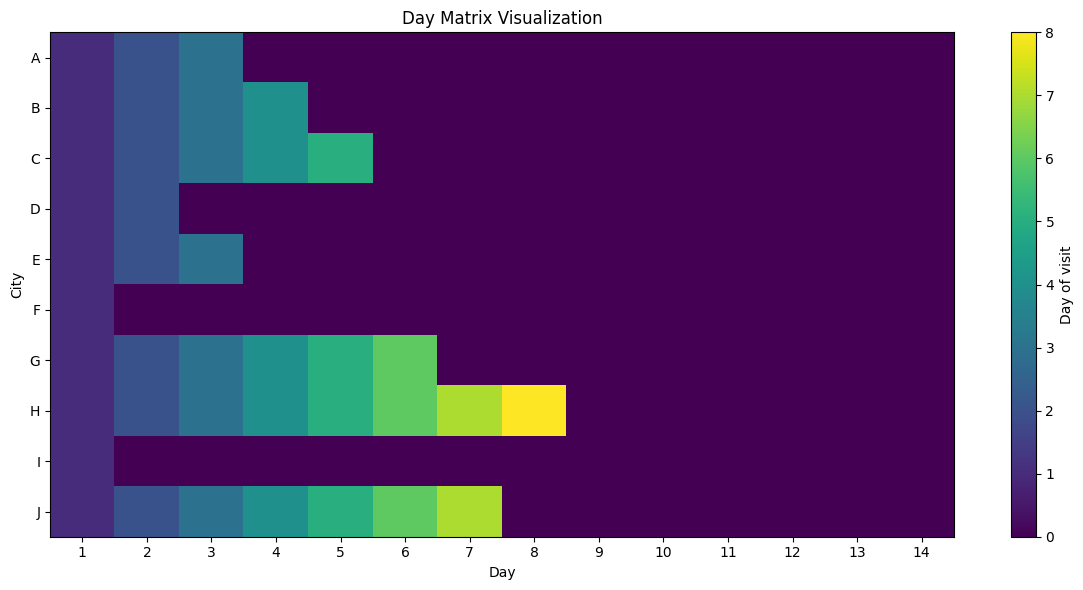

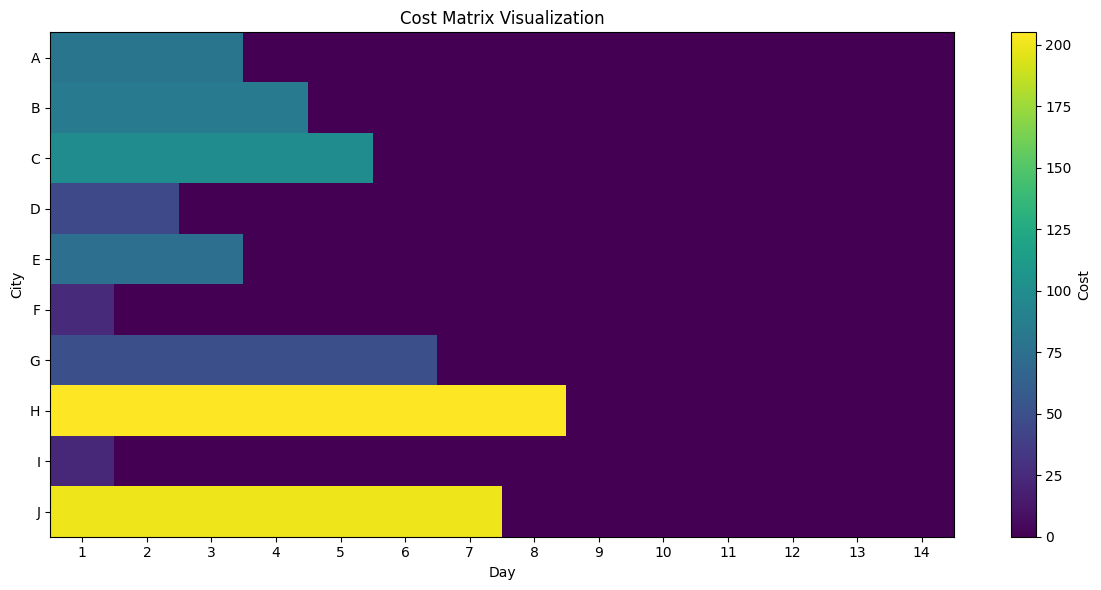

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities and their properties (days to stay, cost)
cities = {
    'A': {'days': 3, 'cost': 80},
    'B': {'days': 4, 'cost': 85},
    'C': {'days': 5, 'cost': 100},
    'D': {'days': 2, 'cost': 45},
    'E': {'days': 3, 'cost': 75},
    'F': {'days': 1, 'cost': 25},
    'G': {'days': 6, 'cost': 50},
    'H': {'days': 8, 'cost': 205},
    'I': {'days': 1, 'cost': 24},
    'J': {'days': 7, 'cost': 200},
}

# Create a list of cities in the order they appear in the 'cities' dictionary
city_order = list(cities.keys())

# Initialize the day and cost matrices
num_cities = len(cities)
max_days = 14
day_matrix = np.zeros((num_cities, max_days), dtype=int)
cost_matrix = np.zeros((num_cities, max_days), dtype=int)

# Populate the day and cost matrices based on the provided data
for city_index, (city, info) in enumerate(cities.items()):
    days_to_stay = info['days']
    cost_per_day = info['cost']
    for day in range(days_to_stay):
        day_matrix[city_index, day] = day + 1
        cost_matrix[city_index, day] = cost_per_day

# Plotting the day matrix
plt.figure(figsize=(12, 6))
plt.imshow(day_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Day of visit')
plt.title('Day Matrix Visualization')
plt.xlabel('Day')
plt.ylabel('City')
plt.xticks(np.arange(max_days), np.arange(1, max_days + 1))
plt.yticks(np.arange(num_cities), city_order)
plt.tight_layout()
plt.show()

# Plotting the cost matrix
plt.figure(figsize=(12, 6))
plt.imshow(cost_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Cost')
plt.title('Cost Matrix Visualization')
plt.xlabel('Day')
plt.ylabel('City')
plt.xticks(np.arange(max_days), np.arange(1, max_days + 1))
plt.yticks(np.arange(num_cities), city_order)
plt.tight_layout()
plt.show()

In [9]:
import random

def generate_initial_population(population_size, num_cities, max_days):
    population = []
    for _ in range(population_size):
        # Initialize empty day and cost matrices
        day_matrix = [[0] * max_days for _ in range(num_cities)]
        cost_matrix = [[0] * max_days for _ in range(num_cities)]
        
        # Randomly assign days and costs for each city
        for city_index in range(num_cities):
            days_to_stay = random.randint(1, max_days)
            days_visited = random.sample(range(max_days), days_to_stay)
            for day in days_visited:
                day_matrix[city_index][day] = day + 1
                cost_matrix[city_index][day] = cities[city_order[city_index]]['cost']
        
        # Append the individual itinerary to the population
        population.append([day_matrix, cost_matrix])
    
    return population

# Example usage
population_size = 10
num_cities = len(cities)
max_days = 14

initial_population = generate_initial_population(population_size, num_cities, max_days)

In [15]:
import random

# Define the cities and their properties (days to stay, cost)
cities = {
    'A': {'days': 3, 'cost': 80},
    'B': {'days': 4, 'cost': 85},
    'C': {'days': 5, 'cost': 100},
    'D': {'days': 2, 'cost': 45},
    'E': {'days': 3, 'cost': 75},
    'F': {'days': 1, 'cost': 25},
    'G': {'days': 6, 'cost': 50},
    'H': {'days': 8, 'cost': 205},
    'I': {'days': 1, 'cost': 24},
    'J': {'days': 7, 'cost': 200},
}

def generate_initial_population(population_size, max_cities, max_days):
    population = []
    for _ in range(population_size):
        # Randomly select a number of cities for the individual
        num_cities = random.randint(1, max_cities)
        
        # Initialize individual with empty itinerary
        individual = []
        total_days = 0
        while total_days < max_days and len(individual) < num_cities:
            city = random.choice(list(cities.keys()))
            days_to_stay = random.randint(1, min(cities[city]['days'], max_days - total_days))
            individual.append((city, days_to_stay))
            total_days += days_to_stay
        population.append(individual)
    return population

def calculate_fitness(individual):
    total_days = 0
    total_cost = 0
    for city, days_to_stay in individual:
        total_days += days_to_stay
        total_cost += cities[city]['cost']
    fitness = total_days / total_cost if total_cost > 0 else 0  # Avoid division by zero
    return fitness

def roulette_wheel_selection(population, fitness_values, num_parents):
    selected_parents = []
    total_fitness = sum(fitness_values)
    
    # Normalize fitness values to probabilities
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    
    # Perform selection
    for _ in range(num_parents):
        selected_index = random.choices(range(len(population)), weights=probabilities)[0]
        selected_parents.append(population[selected_index])
    
    return selected_parents

# Example usage
population_size = 10
max_cities = 5
max_days = 14

initial_population = generate_initial_population(population_size, max_cities, max_days)
print(initial_population)

# Calculate fitness values for the initial population
fitness_values = [calculate_fitness(individual) for individual in initial_population]

# Perform selection
num_parents = 2  # Number of parents to select for crossover
selected_parents = roulette_wheel_selection(initial_population, fitness_values, num_parents)
print("Selected Parents:")
for parent in selected_parents:
    print(parent)


[[('F', 1), ('E', 3)], [('B', 4), ('J', 2)], [('I', 1)], [('J', 6)], [('B', 3), ('E', 1), ('E', 3)], [('B', 4), ('F', 1), ('F', 1), ('I', 1), ('F', 1)], [('I', 1), ('C', 5)], [('F', 1), ('H', 2), ('D', 1), ('F', 1)], [('A', 3), ('H', 6), ('B', 2), ('B', 3)], [('D', 2), ('H', 7), ('I', 1), ('F', 1)]]
Selected Parents:
[('A', 3), ('H', 6), ('B', 2), ('B', 3)]
[('F', 1), ('E', 3)]
